In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os

import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import linregress
from scipy import signal

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus']=False

# 示例图 
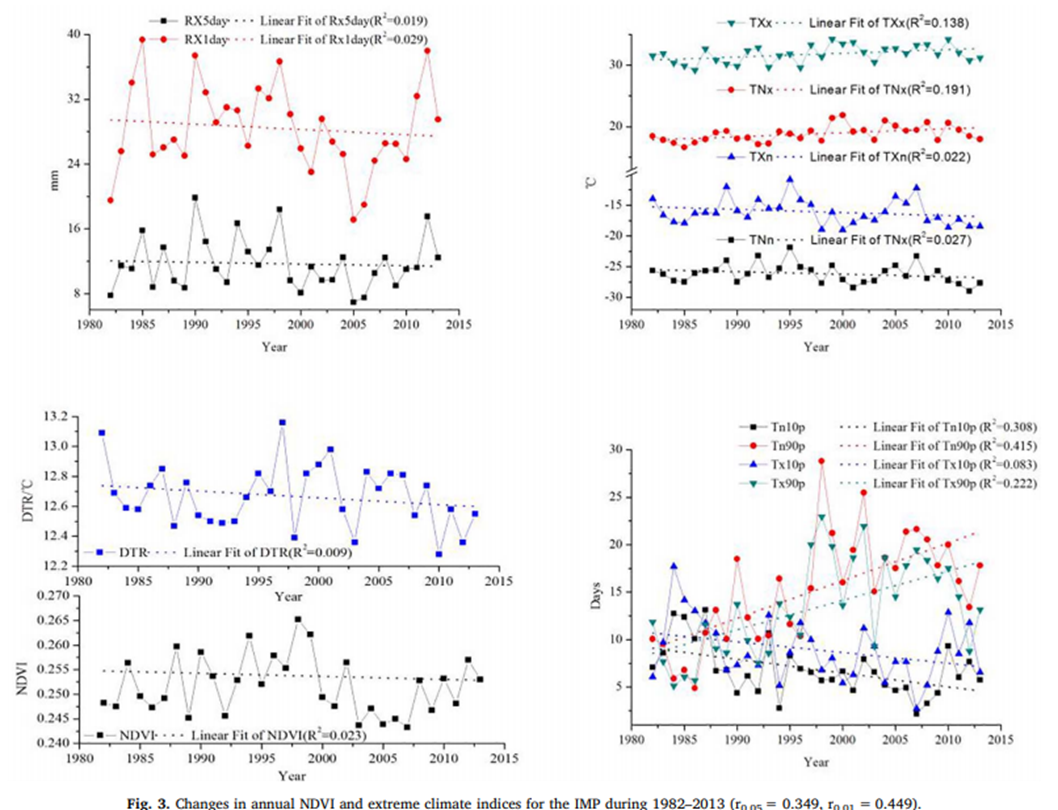

# TXX

In [2]:
Mean_TXX =np.full(34,fill_value=np.nan)
path = '/mnt/f/cn05/cn05_huabei/TXX/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/cn05_huabei/TXX/',file)
    txx_area = xr.open_dataset(inputfile)
    Mean_TXX[i] = np.nanmean(txx_area.tmax)
    i = i + 1
Mean_TXX

array([33.70795441, 33.08520889, 32.52894974, 32.96537399, 33.3599968 ,
       34.38494492, 33.60803223, 33.2170372 , 32.9437294 , 34.25393295,
       34.05957031, 32.21386337, 33.76344299, 33.61314392, 32.89033508,
       36.15885544, 33.69014359, 36.12318802, 36.06518936, 36.00253677,
       34.78440857, 32.68729401, 34.79457855, 35.90543365, 33.93684387,
       35.34025574, 34.57385635, 34.96926117, 37.24081421, 34.3247261 ,
       33.31845093, 33.22938156, 35.44849014, 34.48204422])

# TNN

In [5]:
Mean_TNN =np.full(34,fill_value=np.nan)
path = '/mnt/f/cn05/cn05_huabei/TNN/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/cn05_huabei/TNN/',file)
    tnn_area = xr.open_dataset(inputfile)
    Mean_TNN[i] = np.nanmean(tnn_area.tmin)
    i = i + 1
Mean_TNN

array([-27.2517662 , -28.59779739, -29.20265007, -29.3173008 ,
       -27.75909424, -28.04239082, -26.6746521 , -26.01373863,
       -29.03905106, -28.01025963, -24.36264801, -27.65928841,
       -26.47167587, -23.56773186, -25.81541634, -26.454319  ,
       -28.61366272, -25.98265839, -29.10775566, -29.16270638,
       -28.60309982, -27.96522903, -27.696455  , -27.01023674,
       -27.01259995, -23.70780563, -28.77547646, -27.82488441,
       -29.36967659, -28.21020889, -28.99490166, -28.86959457,
       -25.10709381, -24.81445694])

# TNX

In [6]:
Mean_TNx =np.full(34,fill_value=np.nan)
path = '/mnt/f/cn05/cn05_huabei/TNx/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/cn05_huabei/TNx/',file)
    tnx_area = xr.open_dataset(inputfile)
    Mean_TNx[i] = np.nanmean(tnx_area.tmin)
    i = i + 1
Mean_TNx

array([19.9458065 , 19.86054802, 19.6616497 , 19.18799591, 19.1995182 ,
       19.63933563, 20.83439255, 20.74569321, 19.90942001, 20.27894402,
       19.45883369, 18.80898476, 21.00587273, 20.26765251, 19.88677979,
       21.50074577, 20.0883503 , 21.93145561, 22.51589584, 21.75801468,
       21.20091057, 20.34918594, 21.57298088, 22.10589981, 20.79587936,
       20.80302048, 21.34596634, 20.61201477, 22.78987503, 21.30267143,
       20.52463531, 20.96735382, 21.33444214, 20.2938118 ])

# TXN

In [7]:
Mean_TXn =np.full(34,fill_value=np.nan)
path = '/mnt/f/cn05/cn05_huabei/TXn/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/cn05_huabei/TXn/',file)
    txn_area = xr.open_dataset(inputfile)
    Mean_TXn[i] = np.nanmean(txn_area.tmax)
    i = i + 1
Mean_TXn

array([-15.65289211, -16.23981285, -18.56727219, -18.19836426,
       -16.50203133, -18.12114716, -16.33662224, -13.47766876,
       -16.39871407, -17.66013336, -12.81890392, -15.61065483,
       -15.07519054, -11.6009779 , -14.26623535, -14.81728935,
       -18.45809364, -16.03722   , -17.9888134 , -18.83550835,
       -17.28013992, -17.03710556, -17.04992485, -15.5482254 ,
       -15.32576561, -12.78596306, -17.61205101, -18.01989937,
       -18.9233036 , -17.32144165, -17.97337151, -18.31782341,
       -13.40675163, -13.64331627])

# DTR

In [8]:
def TXTN_index_DTR(tx,tn):
    txtndtr=tx-tn
    DTR=np.mean(txtndtr,axis=0)
    return DTR

DTR_matrix =np.full((34,101,141),fill_value=np.nan)
path = '/mnt/f/cn05/cn05_huabei/tmaxmin/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/cn05_huabei/tmaxmin/',file)
    t_year = xr.open_dataset(inputfile)
    DTR_matrix[i,:,:] = TXTN_index_DTR(t_year.tmax, t_year.tmin)
    i = i + 1

In [9]:
Mean_DTR =np.full(34,fill_value=np.nan)
i = 0
for j in range(34):
    Mean_DTR[i] = np.nanmean(DTR_matrix[j,:,:])
    i = i + 1

In [10]:
 Mean_DTR

array([13.42469074, 13.02982237, 12.92202027, 12.85313785, 13.30422928,
       13.2771948 , 12.77808598, 13.00112691, 12.83152373, 12.87916325,
       12.94667299, 12.88333428, 12.94673947, 13.20996522, 12.95706567,
       13.53437577, 12.77885204, 13.13341181, 13.15180625, 13.19131714,
       12.96770924, 12.55972832, 13.13552538, 13.06783431, 13.09274126,
       13.07391802, 12.90429941, 13.02569396, 12.45624163, 12.73951442,
       12.5797377 , 12.72881754, 12.89261831, 12.69697511])

# Tx90

In [11]:
def TX_index_TX90p(tx,tx90th):
    dtx=tx-tx90th
    dtx01=np.where(dtx>0,1,np.nan)
    TX90p=np.nansum(dtx01,axis=0)
    return TX90p

tmax1982_2015 = xr.open_dataset('/mnt/f/cn05/cn05_huabei/huabeicn05.1_tmax_1982_2015.nc')
tmax90 = np.percentile(tmax1982_2015.tmax,90,axis=0)

TX90_matrix =np.full((34,101,141),fill_value=np.nan)
path = '/mnt/f/cn05/cn05_huabei/tmax/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/cn05_huabei/tmax/',file)
    t_year = xr.open_dataset(inputfile)
    TX90_matrix[i,:,:] = TX_index_TX90p(t_year.tmax,tmax90)
    i = i + 1

TX90_matrix[TX90_matrix==0]=np.nan

In [12]:
Mean_TX90 =np.full(34,fill_value=np.nan)
i = 0
for j in range(34):
    Mean_TX90[i] = np.nanmean(TX90_matrix[j,:,:])
    i = i + 1

Mean_TX90

array([34.49924869, 28.47295267, 25.30728775, 25.34522915, 26.47746056,
       27.38467318, 30.96130729, 25.02141247, 25.37340346, 38.31855748,
       27.25957926, 18.98760331, 39.30465815, 26.95492111, 26.71712998,
       51.57625845, 31.55785124, 47.57400451, 50.5484598 , 54.94102179,
       45.92900075, 29.3959429 , 36.702855  , 44.82870023, 42.95229151,
       51.52516905, 40.09767092, 40.31404959, 49.74229902, 44.28399699,
       37.25244177, 40.1930879 , 36.756574  , 39.44252442])

# Tx10

In [13]:
def TX_index_TX10p(tx,tx10th):
    dtx=tx-tx10th
    dtx01=np.where(dtx<0,1,np.nan)
    TX10p=np.nansum(dtx01,axis=0)
    return TX10p

tmax1982_2015 = xr.open_dataset('/mnt/f/cn05/cn05_huabei/huabeicn05.1_tmax_1982_2015.nc')
tmax10 = np.nanpercentile(tmax1982_2015.tmax,10,axis=0)

TX10_matrix =np.full((34,101,141),fill_value=np.nan)
path = '/mnt/f/cn05/cn05_huabei/tmax/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/cn05_huabei/tmax/',file)
    t_year = xr.open_dataset(inputfile)
    TX10_matrix[i,:,:] = TX_index_TX10p(t_year.tmax,tmax10)
    i = i + 1

TX10_matrix[TX10_matrix==0]=np.nan

/home/yqr/miniconda3/envs/python/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [14]:
Mean_TX10 =np.full(34,fill_value=np.nan)
i = 0
for j in range(34):
    Mean_TX10[i] = np.nanmean(TX10_matrix[j,:,:])
    i = i + 1

Mean_TX10

array([29.01164538, 36.80428249, 58.46619083, 57.75995492, 42.23516153,
       33.69984974, 40.09353869, 27.04019534, 37.17167543, 33.5202855 ,
       24.44815928, 43.4797145 , 32.95492111, 22.72083333, 37.53719008,
       25.46769346, 32.78211871, 25.00488355, 43.77873779, 46.4214876 ,
       24.03305785, 28.17580766, 34.30390684, 54.61570248, 35.02329076,
       18.19571751, 40.82193839, 41.34898573, 46.67731029, 49.11645379,
       58.74718257, 34.0785124 , 29.28474831, 17.36664162])

# Tn90

In [15]:
def TN_index_TN90p(tn,tn90th):
    dtn=tn-tn90th
    dtn01=np.where(dtn>0,1,np.nan)
    TN90p=np.nansum(dtn01,axis = 0)
    return TN90p

tmin1982_2015 = xr.open_dataset('/mnt/f/cn05/cn05_huabei/huabeicn05.1_tmin_1982_2015.nc')
tmin90 = np.nanpercentile(tmin1982_2015.tmin,90,axis=0)

TN90_matrix =np.full((34,101,141),fill_value=np.nan)
path = '/mnt/f/cn05/cn05_huabei/tmin/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/cn05_huabei/tmin/',file)
    t_yearmin = xr.open_dataset(inputfile)
    TN90_matrix[i,:,:] = TN_index_TN90p(t_yearmin.tmin,tmin90)
    i = i + 1

TN90_matrix[TN90_matrix==0]=np.nan

/home/yqr/miniconda3/envs/python/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [16]:
Mean_TN90 =np.full(34,fill_value=np.nan)
i = 0
for j in range(34):
    Mean_TN90[i] = np.nanmean(TN90_matrix[j,:,:])
    i = i + 1

Mean_TN90

array([30.03080391, 26.59316304, 25.67768595, 26.5458302 , 21.13561232,
       21.95604808, 40.64913599, 26.63486101, 30.95867769, 35.3350864 ,
       24.39143501, 25.85424493, 44.90646131, 26.59466566, 32.20172802,
       44.12734786, 41.50638618, 44.6930879 , 45.13072878, 43.7768595 ,
       40.26821938, 32.2310293 , 31.45041322, 45.05860255, 43.29827198,
       46.16003005, 40.13110443, 36.96543952, 48.42599549, 47.49398948,
       47.16791886, 50.78700225, 36.11795642, 37.74417731])

# Tn10

In [17]:
def TN_index_TN10p(tn,tn10th):
    dtn=tn-tn10th
    dtn01=np.where(dtn<0,1,np.nan)
    TN10p=np.nansum(dtn01,axis=0)
    return TN10p

tmin1982_2015 = xr.open_dataset('/mnt/f/cn05/cn05_huabei/huabeicn05.1_tmin_1982_2015.nc')
tmin10 = np.nanpercentile(tmin1982_2015.tmin,10,axis=0)

TN10_matrix =np.full((34,101,141),fill_value=np.nan)
path = '/mnt/f/cn05/cn05_huabei/tmin/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/cn05_huabei/tmin/',file)
    t_yearmin = xr.open_dataset(inputfile)
    TN10_matrix[i,:,:] = TN_index_TN10p(t_yearmin.tmin,tmin10)
    i = i + 1

TN10_matrix[TN10_matrix==0]=np.nan

/home/yqr/miniconda3/envs/python/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [18]:
Mean_TN10 =np.full(34,fill_value=np.nan)
i = 0
for j in range(34):
    Mean_TN10[i] = np.nanmean(TN10_matrix[j,:,:])
    i = i + 1

Mean_TN10

array([34.87340346, 42.99849737, 61.00300526, 57.73666416, 45.83057851,
       36.28700225, 40.33020285, 24.40909091, 38.0987979 , 33.51164538,
       30.78549962, 38.86513899, 31.09015778, 25.57588279, 40.25882795,
       31.78512397, 30.96280992, 23.95191585, 44.33658903, 41.19158527,
       21.72802404, 28.84522915, 30.8069121 , 52.24417731, 32.24380165,
       16.6649136 , 41.74718257, 38.84297521, 42.99173554, 44.43801653,
       57.65777611, 35.97257701, 29.78324568, 14.15101427])

# Rx1day

In [19]:
rx1day_matrix = np.full((34,101,141),fill_value=np.nan)
path = '/mnt/f/cn05/cn05_huabei/Rx1day/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/cn05_huabei/Rx1day/',file)
    rx1day_area = xr.open_dataset(inputfile)
    rx1day_matrix[i,:,:] = rx1day_area.highest_one_day_precipitation_amount_per_time_period
    i = i + 1    

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


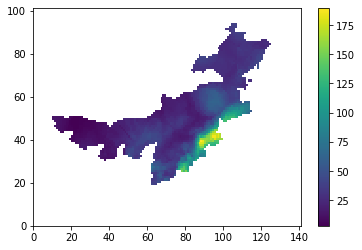

In [20]:
plt.pcolormesh(rx1day_matrix[2,:],cmap = 'viridis')
plt.colorbar()

In [21]:
Mean_Rx1day =np.full(34,fill_value=np.nan)
path = '/mnt/f/cn05/cn05_huabei/Rx1day/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/cn05_huabei/Rx1day/',file)
    rx1day_area = xr.open_dataset(inputfile)
    Mean_Rx1day[i] = np.nanmean(rx1day_area.highest_one_day_precipitation_amount_per_time_period)
    i = i + 1
Mean_Rx1day

array([29.1202755 , 29.63447952, 37.14011002, 31.27316666, 26.43061829,
       30.79712677, 33.272789  , 27.92197418, 32.94604111, 32.28146362,
       29.59233284, 27.16457367, 38.2549324 , 32.68593216, 37.08151627,
       32.88809586, 40.46580505, 25.4692955 , 29.36040878, 30.98399925,
       25.96703339, 30.23714828, 30.17835236, 27.79081535, 26.22002411,
       29.61424637, 29.32168579, 29.21282768, 29.41539192, 30.97648048,
       43.03808975, 33.21661758, 26.44026184, 24.89496231])

改后

In [4]:
rx1day_matrix = np.full((34,101,141),fill_value=np.nan)
path = '/mnt/f/cn05/new_pre/Rx1day/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join(path,file)
    rx1day_area = xr.open_dataset(inputfile)
    rx1day_matrix[i,:,:] = rx1day_area.highest_one_day_precipitation_amount_per_time_period
    i = i + 1 

In [5]:
Mean_Rx1day =np.full(34,fill_value=np.nan)
path = '/mnt/f/cn05/new_pre/Rx1day/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join(path,file)
    rx1day_area = xr.open_dataset(inputfile)
    Mean_Rx1day[i] = np.nanmean(rx1day_area.highest_one_day_precipitation_amount_per_time_period)
    i = i + 1
Mean_Rx1day

array([29.32058334, 29.69329071, 37.15983582, 31.26577377, 26.44727898,
       31.00270653, 33.2766304 , 28.01074791, 33.01465225, 32.34369278,
       29.61748123, 27.25257111, 38.4033432 , 32.81558609, 37.24636078,
       33.01815033, 40.57442856, 25.50772667, 29.52675438, 31.04923439,
       26.0470047 , 30.4611454 , 30.27366638, 27.89138794, 26.27767563,
       29.81155205, 29.44177818, 29.46504021, 29.62099457, 31.12127304,
       42.49575424, 33.40704346, 26.2738018 , 24.99622345])

# R1mm

In [22]:
r1mm_matrix = np.full((34,101,141),fill_value=np.nan)
path = '/mnt/f/cn05/cn05_huabei/R1mm/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/cn05_huabei/R1mm/',file)
    r1mm_area = xr.open_dataset(inputfile)
    r1mm_matrix[i,:,:] = r1mm_area.precipitation_days_index_per_time_period
    i = i + 1

In [23]:
Mean_R1m =np.full(34,fill_value=np.nan)
path = '/mnt/f/cn05/cn05_huabei/R1mm/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join(path,file)
    r1mm_area = xr.open_dataset(inputfile)
    Mean_R1m[i] = np.nanmean(r1mm_area.precipitation_days_index_per_time_period)
    i = i + 1
Mean_R1m

array([55.40120316, 59.94365311, 61.05447006, 63.10405731, 54.04507828,
       57.05747604, 60.86889648, 54.76295853, 67.33170319, 62.12884903,
       61.70961761, 61.96018219, 56.96994781, 56.15101242, 60.97182465,
       49.38204193, 65.17205048, 51.33020401, 53.43876648, 51.3024025 ,
       55.70435715, 65.94628143, 55.27836227, 53.14237595, 52.74981308,
       52.26408768, 61.91322327, 54.92824936, 58.60142899, 55.12171173,
       64.08527374, 64.67993927, 65.07324982, 69.19120789])

改后

In [6]:
r1mm_matrix = np.full((34,101,141),fill_value=np.nan)
path = '/mnt/f/cn05/new_pre/R1mm/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join(path,file)
    r1mm_area = xr.open_dataset(inputfile)
    r1mm_matrix[i,:,:] = r1mm_area.precipitation_days_index_per_time_period
    i = i + 1

Mean_R1m =np.full(34,fill_value=np.nan)
path = '/mnt/f/cn05/new_pre/R1mm/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join(path,file)
    r1mm_area = xr.open_dataset(inputfile)
    Mean_R1m[i] = np.nanmean(r1mm_area.precipitation_days_index_per_time_period)
    i = i + 1
Mean_R1m

array([55.39669418, 60.13373566, 61.01164627, 63.18895721, 54.2126236 ,
       57.24342728, 61.07062531, 54.91660309, 67.5890274 , 62.31066895,
       62.07175064, 62.34860992, 57.16604233, 56.34710693, 61.16529083,
       49.60593414, 65.46092987, 51.62659836, 53.64274979, 51.60105133,
       56.01089478, 66.22126007, 55.60480881, 53.38955688, 53.01202011,
       52.7539444 , 62.15364456, 55.2539444 , 58.90495682, 55.32006073,
       64.12922668, 62.04169846, 62.65740204, 66.50675964])

# R10mm

In [24]:
Mean_R10m =np.full(34,fill_value=np.nan)
path = '/mnt/f/cn05/cn05_huabei/R10mm/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join(path,file)
    r10mm_area = xr.open_dataset(inputfile)
    Mean_R10m[i] = np.nanmean(r10mm_area.precipitation_days_index_per_time_period)
    i = i + 1
Mean_R10m

array([ 7.74718237,  9.04582977,  8.98422241,  9.92148781,  7.85725021,
        8.79526711, 10.01089382,  7.53944397, 11.16604042,  9.49474049,
        8.26521397,  9.30991745,  9.68632603,  9.16341114,  9.83395958,
        6.88918114, 12.37114906,  6.74868536,  6.76821947,  5.82419252,
        7.42449284,  9.71111965,  8.48910618,  7.33546209,  7.37152529,
        7.88054085,  9.29939938,  7.37039804,  8.53906822,  8.03080368,
       10.87265205, 11.4147253 ,  8.80841446,  8.51277256])

改后

In [7]:
Mean_R10m =np.full(34,fill_value=np.nan)
path = '/mnt/f/cn05/new_pre/R10mm/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join(path,file)
    r10mm_area = xr.open_dataset(inputfile)
    Mean_R10m[i] = np.nanmean(r10mm_area.precipitation_days_index_per_time_period)
    i = i + 1
Mean_R10m

array([ 7.76070642,  9.05334377,  8.98685169,  9.91021824,  7.86476326,
        8.81104469, 10.00901604,  7.53005266, 11.1622839 ,  9.52667141,
        8.25469589,  9.30728817,  9.68782902,  9.19909859,  9.86889553,
        6.90308046, 12.37828732,  6.73215628,  6.76972198,  5.82381678,
        7.42449284,  9.72389221,  8.51953411,  7.33095407,  7.36851978,
        7.9256196 ,  9.32982731,  7.42148781,  8.59015751,  8.0777607 ,
       10.76859474, 11.40758801,  8.92787361,  8.63185596])

# R20mm

In [25]:
Mean_R20m =np.full(34,fill_value=np.nan)
path = '/mnt/f/cn05/cn05_huabei/R20mm/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join(path,file)
    r20mm_area = xr.open_dataset(inputfile)
    Mean_R20m[i] = np.nanmean(r20mm_area.precipitation_days_index_per_time_period)
    i = i + 1
Mean_R20m

array([2.28024054, 2.29000759, 2.63899326, 2.87490606, 1.99924874,
       2.4455297 , 3.11457562, 2.089782  , 3.28249431, 3.001127  ,
       1.85987973, 1.98084152, 2.91359878, 3.24530435, 3.14800906,
       1.91735542, 3.92449284, 1.56123221, 1.9410218 , 1.72426748,
       1.75770092, 2.51352358, 2.42148757, 1.72351611, 1.90345609,
       2.1190834 , 2.38993239, 2.19308782, 2.48797894, 2.30503392,
       3.67693472, 3.52930117, 2.07663417, 1.70323062])

改后

In [8]:
Mean_R20m =np.full(34,fill_value=np.nan)
path = '/mnt/f/cn05/new_pre/R20mm/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join(path,file)
    r20mm_area = xr.open_dataset(inputfile)
    Mean_R20m[i] = np.nanmean(r20mm_area.precipitation_days_index_per_time_period)
    i = i + 1
Mean_R20m

array([2.27685952, 2.27761078, 2.635988  , 2.86513901, 2.00075126,
       2.4466567 , 3.11983466, 2.08715248, 3.27498126, 3.00262952,
       1.85725021, 1.98384678, 2.91510153, 3.24906087, 3.1551466 ,
       1.92336583, 3.92674685, 1.5578512 , 1.95154023, 1.72915101,
       1.76108193, 2.52404213, 2.42937636, 1.73065364, 1.90984225,
       2.12321568, 2.38504887, 2.20323062, 2.49323821, 2.3174305 ,
       3.65890312, 3.51126981, 2.04996252, 1.73215628])

# NDVI

In [19]:
def MCV(ndvi):
    NDVI=np.nanmax(ndvi,axis=0)
    return NDVI

example=xr.open_dataset('/mnt/f/month/huabei_ndvi3g_geo_v1_1982_01.nc4')
total_lon=len(example.lon)
total_lat=len(example.lat)


NDVI_matrix =np.full((408,300,420),fill_value=np.nan)
path = '/mnt/f/month/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join('/mnt/f/month/',file)
    input_ndvi = xr.open_dataset(inputfile)
    NDVI_matrix[i,:,:] = MCV(input_ndvi.ndvi)
    i=i+1

/tmp/ipykernel_93/2336396506.py:2: RuntimeWarning: All-NaN axis encountered
  NDVI=np.nanmax(ndvi,axis=0)


NDVI_matrix 是月序列1982-2015  NDVI_matrix2 是月序列 维度翻转后的

In [20]:
NDVI_matrix2 =NDVI_matrix[:,::-1,:]

In [21]:
def MEAN(ndvi):
    NDVI=np.nanmean(ndvi,axis=0)
    return NDVI

In [22]:
mean_NDVI = np.full((300,420),fill_value=np.nan)

In [23]:
mean_NDVI = np.nanmean(NDVI_matrix2,axis = 0)

/tmp/ipykernel_93/3995897480.py:1: RuntimeWarning: Mean of empty slice
  mean_NDVI = np.nanmean(NDVI_matrix2,axis = 0)


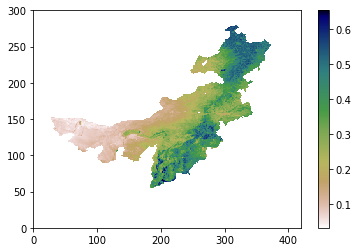

In [24]:
plt.pcolormesh(mean_NDVI/10000,cmap = 'gist_earth_r',)
plt.colorbar()
#多年平均

In [29]:
year_NDVI = np.full((34,300,420),fill_value=np.nan)
year_NDVI[0,:,:]=MEAN(NDVI_matrix2[0:12,:,:])
year_NDVI[1,:,:]=MEAN(NDVI_matrix2[12:24,:,:])
year_NDVI[2,:,:]=MEAN(NDVI_matrix2[24:36,:,:])
year_NDVI[3,:,:]=MEAN(NDVI_matrix2[36:48,:,:])
year_NDVI[4,:,:]=MEAN(NDVI_matrix2[48:60,:,:])
year_NDVI[5,:,:]=MEAN(NDVI_matrix2[60:72,:,:])
year_NDVI[6,:,:]=MEAN(NDVI_matrix2[72:84,:,:])
year_NDVI[7,:,:]=MEAN(NDVI_matrix2[84:96,:,:])
year_NDVI[8,:,:]=MEAN(NDVI_matrix2[96:108,:,:])
year_NDVI[9,:,:]=MEAN(NDVI_matrix2[108:120,:,:])
year_NDVI[10,:,:]=MEAN(NDVI_matrix2[120:132,:,:])
year_NDVI[11,:,:]=MEAN(NDVI_matrix2[132:144,:,:])
year_NDVI[12,:,:]=MEAN(NDVI_matrix2[144:156,:,:])
year_NDVI[13,:,:]=MEAN(NDVI_matrix2[156:168,:,:])
year_NDVI[14,:,:]=MEAN(NDVI_matrix2[168:180,:,:])
year_NDVI[15,:,:]=MEAN(NDVI_matrix2[180:192,:,:])
year_NDVI[16,:,:]=MEAN(NDVI_matrix2[192:204,:,:])
year_NDVI[17,:,:]=MEAN(NDVI_matrix2[204:216,:,:])
year_NDVI[18,:,:]=MEAN(NDVI_matrix2[216:228,:,:])
year_NDVI[19,:,:]=MEAN(NDVI_matrix2[228:240,:,:])
year_NDVI[20,:,:]=MEAN(NDVI_matrix2[240:252,:,:])
year_NDVI[21,:,:]=MEAN(NDVI_matrix2[252:264,:,:])
year_NDVI[22,:,:]=MEAN(NDVI_matrix2[264:276,:,:])
year_NDVI[23,:,:]=MEAN(NDVI_matrix2[276:288,:,:])
year_NDVI[24,:,:]=MEAN(NDVI_matrix2[288:300,:,:])
year_NDVI[25,:,:]=MEAN(NDVI_matrix2[300:312,:,:])
year_NDVI[26,:,:]=MEAN(NDVI_matrix2[312:324,:,:])
year_NDVI[27,:,:]=MEAN(NDVI_matrix2[324:336,:,:])
year_NDVI[28,:,:]=MEAN(NDVI_matrix2[336:348,:,:])
year_NDVI[29,:,:]=MEAN(NDVI_matrix2[348:360,:,:])
year_NDVI[30,:,:]=MEAN(NDVI_matrix2[360:372,:,:])
year_NDVI[31,:,:]=MEAN(NDVI_matrix2[372:384,:,:])
year_NDVI[32,:,:]=MEAN(NDVI_matrix2[384:396,:,:])
year_NDVI[33,:,:]=MEAN(NDVI_matrix2[396:408,:,:])

/tmp/ipykernel_93/3194269402.py:2: RuntimeWarning: Mean of empty slice
  NDVI=np.nanmean(ndvi,axis=0)


In [25]:
year_NDVI = np.full((34,300,420),fill_value=np.nan)

In [26]:
i = 0
for j in range(34):
    year_NDVI[j,:,:]=MEAN(NDVI_matrix2[i:i+12,:,:])
    i=i+12

/tmp/ipykernel_93/3194269402.py:2: RuntimeWarning: Mean of empty slice
  NDVI=np.nanmean(ndvi,axis=0)


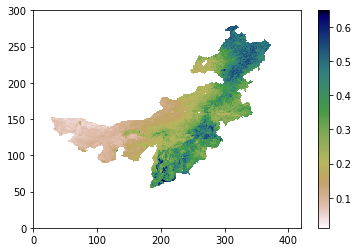

In [49]:
plt.pcolormesh(year_NDVI[1,:]/10000,cmap = 'gist_earth_r',)
plt.colorbar()

In [27]:
area_mean_NDVI = np.full(34,fill_value=np.nan)
area_mean_NDVI

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

In [30]:
i = 0
for j in range(34):
    area_mean_NDVI[i] = np.nanmean(year_NDVI[j,:,:])
    i = i + 1

In [31]:
#区域多年平均
Mean_NDVI=area_mean_NDVI/10000

# 插值后NDVI

In [50]:
def MCV(ndvi):
    NDVI=np.nanmax(ndvi,axis=0)
    return NDVI

reNDVI_matrix =np.full((408,101,141),fill_value=np.nan)
path = '/mnt/f/month3/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join(path,file)
    input_ndvi = xr.open_dataset(inputfile)
    reNDVI_matrix[i,:,:] = MCV(input_ndvi.ndvi)
    i=i+1

/tmp/ipykernel_93/2776146143.py:2: RuntimeWarning: All-NaN axis encountered
  NDVI=np.nanmax(ndvi,axis=0)


In [51]:
year_NDVI2 = np.full((34,101,141),fill_value=np.nan)
year_NDVI2[0,:,:]=MEAN(reNDVI_matrix[0:12,:,:])
year_NDVI2[1,:,:]=MEAN(reNDVI_matrix[12:24,:,:])
year_NDVI2[2,:,:]=MEAN(reNDVI_matrix[24:36,:,:])
year_NDVI2[3,:,:]=MEAN(reNDVI_matrix[36:48,:,:])
year_NDVI2[4,:,:]=MEAN(reNDVI_matrix[48:60,:,:])
year_NDVI2[5,:,:]=MEAN(reNDVI_matrix[60:72,:,:])
year_NDVI2[6,:,:]=MEAN(reNDVI_matrix[72:84,:,:])
year_NDVI2[7,:,:]=MEAN(reNDVI_matrix[84:96,:,:])
year_NDVI2[8,:,:]=MEAN(reNDVI_matrix[96:108,:,:])
year_NDVI2[9,:,:]=MEAN(reNDVI_matrix[108:120,:,:])
year_NDVI2[10,:,:]=MEAN(reNDVI_matrix[120:132,:,:])
year_NDVI2[11,:,:]=MEAN(reNDVI_matrix[132:144,:,:])
year_NDVI2[12,:,:]=MEAN(reNDVI_matrix[144:156,:,:])
year_NDVI2[13,:,:]=MEAN(reNDVI_matrix[156:168,:,:])
year_NDVI2[14,:,:]=MEAN(reNDVI_matrix[168:180,:,:])
year_NDVI2[15,:,:]=MEAN(reNDVI_matrix[180:192,:,:])
year_NDVI2[16,:,:]=MEAN(reNDVI_matrix[192:204,:,:])
year_NDVI2[17,:,:]=MEAN(reNDVI_matrix[204:216,:,:])
year_NDVI2[18,:,:]=MEAN(reNDVI_matrix[216:228,:,:])
year_NDVI2[19,:,:]=MEAN(reNDVI_matrix[228:240,:,:])
year_NDVI2[20,:,:]=MEAN(reNDVI_matrix[240:252,:,:])
year_NDVI2[21,:,:]=MEAN(reNDVI_matrix[252:264,:,:])
year_NDVI2[22,:,:]=MEAN(reNDVI_matrix[264:276,:,:])
year_NDVI2[23,:,:]=MEAN(reNDVI_matrix[276:288,:,:])
year_NDVI2[24,:,:]=MEAN(reNDVI_matrix[288:300,:,:])
year_NDVI2[25,:,:]=MEAN(reNDVI_matrix[300:312,:,:])
year_NDVI2[26,:,:]=MEAN(reNDVI_matrix[312:324,:,:])
year_NDVI2[27,:,:]=MEAN(reNDVI_matrix[324:336,:,:])
year_NDVI2[28,:,:]=MEAN(reNDVI_matrix[336:348,:,:])
year_NDVI2[29,:,:]=MEAN(reNDVI_matrix[348:360,:,:])
year_NDVI2[30,:,:]=MEAN(reNDVI_matrix[360:372,:,:])
year_NDVI2[31,:,:]=MEAN(reNDVI_matrix[372:384,:,:])
year_NDVI2[32,:,:]=MEAN(reNDVI_matrix[384:396,:,:])
year_NDVI2[33,:,:]=MEAN(reNDVI_matrix[396:408,:,:])

/tmp/ipykernel_93/3194269402.py:2: RuntimeWarning: Mean of empty slice
  NDVI=np.nanmean(ndvi,axis=0)


In [52]:
year_NDVI2.shape

(34, 101, 141)

# 多年区域平均趋势图

In [9]:
year = np.arange(1982,2016,1)
year

array([1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [32]:
ndvi_area_mean =[0.27577062, 0.27610593, 0.2799162 , 0.27714872, 0.27736261,0.28036847, 0.28761135, 0.27875279, 0.29185632, 0.28627033,0.2783267 , 0.27999386, 0.28744378, 0.28621989, 0.28804698,0.28810607, 0.29519219, 0.2887373 , 0.27823198, 0.28009606,0.28682545, 0.28001094, 0.28534065, 0.28260892, 0.28107029,0.28143746, 0.29226807, 0.2845452 , 0.28554943, 0.28733067,0.29931449, 0.2964982 , 0.29915438, 0.29264466]

In [118]:
s1,d1,r1,p1,_ = linregress(year,ndvi_area_mean)
s1,d1,r1,p1

(0.0004021906401833459,
 -0.5185969073475933,
 0.6093895999003476,
 0.00013062364233355645)

Text(2004, 0.276, 'R²=0.3709  p<0.01')

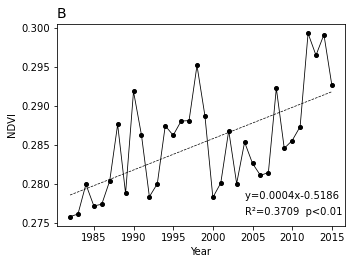

In [151]:
fig1=plt.figure(figsize=(8,7))
ax2 = fig1.add_axes([0.0,0.0,0.5,0.4])
ax2 .plot(year,ndvi_area_mean,lw=0.8,marker='o',color='k',ms='4')
ax2.set_title('B ',fontsize=14,loc='left')
ax2.plot(year,s1*year+d1,'k--',lw=0.7)
ax2.set_xlabel('Year')
ax2.set_ylabel('NDVI')
ax2.text(2004,0.278,'y=0.0004x-0.5186 ')
ax2.text(2004,0.276,'R²=0.3709  p<0.01')

Text(0.0, 1.0, 'A ')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


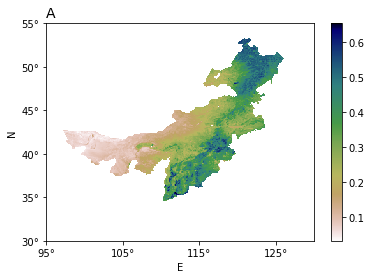

In [13]:
plt.pcolormesh(mean_NDVI/10000,cmap = 'gist_earth_r')
plt.colorbar()
plt.xticks([0,120,240,360],('95°','105°','115°','125°'))
plt.yticks([0,60,120,180,240,300],('30°','35°','40°','45°','50°','55°'))
plt.xlabel('E')
plt.ylabel('N')
plt.title('A ',fontsize=14,loc='left')

In [25]:
s_year_NDVI = year_NDVI.copy()
s_year_NDVI[np.isnan(s_year_NDVI)]=0
slope_NDVI =np.full((300,420),fill_value=np.nan)
NDVI_p =np.full((300,420),fill_value=np.nan)
year = np.arange(1982,2016,1)
for i in range(300):
    for j in range(420):
        slope_NDVI[i,j], _,_,NDVI_p[i,j],_ =linregress(year,s_year_NDVI[:,i,j])

Text(0, 0.5, 'N')

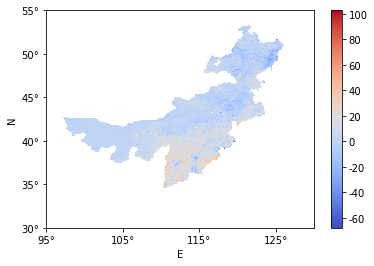

In [53]:
slope_NDVI[slope_NDVI==0]=np.nan
plt.pcolormesh(slope_NDVI,cmap = 'coolwarm')
plt.colorbar()
plt.xticks([0,120,240,360],('95°','105°','115°','125°'))
plt.yticks([0,60,120,180,240,300],('30°','35°','40°','45°','50°','55°'))
plt.xlabel('E')
plt.ylabel('N')

In [34]:
example

<xarray.Dataset>
Dimensions:  (time: 2, lon: 420, lat: 300)
Coordinates:
  * time     (time) float64 0.0 0.0
  * lon      (lon) float64 95.04 95.13 95.21 95.29 ... 129.7 129.8 129.9 130.0
  * lat      (lat) float64 54.96 54.87 54.79 54.71 ... 30.29 30.21 30.12 30.04
Data variables:
    ndvi     (time, lat, lon) float32 ...

In [40]:
lat.shape

(0,)

In [52]:
year = np.arange(1982,1983,1)
lon = np.arange(95.04,129.9,0.083)
lat = np.arange(30.05,54.95,0.083)
slope_da = xr.DataArray(slope_NDVI,coords=[lat,lon],dims=['lat','lon'])
slope_da.to_netcdf(path = '/mnt/f/area_ndvi/slope_ndvi.nc')

In [172]:
year = np.arange(1982,2016,1)
Mean_TXX
Mean_TNN
Mean_TNx
Mean_TXn

array([-15.65289211, -16.23981285, -18.56727219, -18.19836426,
       -16.50203133, -18.12114716, -16.33662224, -13.47766876,
       -16.39871407, -17.66013336, -12.81890392, -15.61065483,
       -15.07519054, -11.6009779 , -14.26623535, -14.81728935,
       -18.45809364, -16.03722   , -17.9888134 , -18.83550835,
       -17.28013992, -17.03710556, -17.04992485, -15.5482254 ,
       -15.32576561, -12.78596306, -17.61205101, -18.01989937,
       -18.9233036 , -17.32144165, -17.97337151, -18.31782341,
       -13.40675163, -13.64331627])

In [36]:
s2,d2,r2,p2,_ = linregress(year,Mean_TXX)
s2,d2,r2,p2

(0.057664805063316164,
 -81.01748737600398,
 0.4629743244194738,
 0.005829166112939271)

In [37]:
s3,d3,r3,p3,_ = linregress(year,Mean_TNN)
s3,d3,r3,p3

(0.013534963795754452,
 -54.433986412905114,
 0.0810696700635365,
 0.6485457806981003)

In [38]:
s4,d4,r4,p4,_ = linregress(year,Mean_TNx)
s4,d4,r4,p4

(0.05584942385656766,
 -90.95376366192006,
 0.5761438391149981,
 0.00036276759283330475)

In [39]:
s5,d5,r5,p5,_ = linregress(year,Mean_TXn)
s5,d5,r5,p5

(-0.004219941677620977,
 -7.828465041502275,
 -0.02120100413859089,
 0.90526644956759)

Text(0.0, 1.0, 'A ')

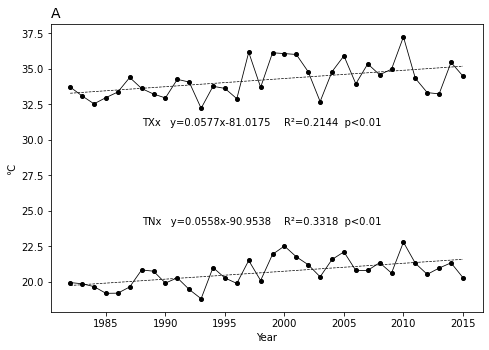

In [66]:
fig2=plt.figure(figsize=(12,10))
ax3 = fig2.add_axes([0.0,0.0,0.5,0.4])
ax3.plot(year,Mean_TXX,lw=0.8,marker='o',color='k',ms='4')
ax3.plot(year,s2*year+d2,'k--',lw=0.7)
ax3.set_xlabel('Year')
ax3.set_ylabel('℃')
ax3.plot(year,Mean_TNx,lw=0.8,marker='o',color='k',ms='4')
ax3.plot(year,s4*year+d4,'k--',lw=0.7)
ax3.text(1988,31,'TXx   y=0.0577x-81.0175 ')
ax3.text(2000,31,'R²=0.2144  p<0.01')
ax3.text(1988,24,'TNx   y=0.0558x-90.9538 ')
ax3.text(2000,24,'R²=0.3318  p<0.01')
ax3.set_title('A ',fontsize=14,loc='left')

Text(0.0, 1.0, 'B ')

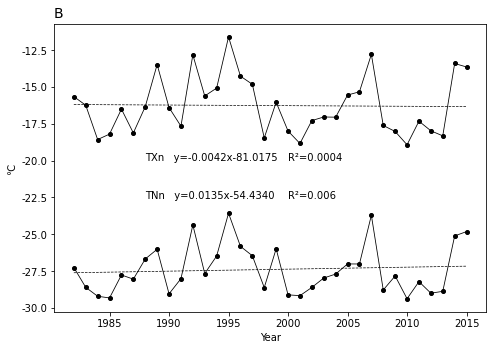

In [67]:
fig3=plt.figure(figsize=(12,10))
ax4 = fig3.add_axes([0.0,0.0,0.5,0.4])
ax4.plot(year,Mean_TNN,lw=0.8,marker='o',color='k',ms='4')
ax4.plot(year,s3*year+d3,'k--',lw=0.7)
ax4.plot(year,Mean_TXn,lw=0.8,marker='o',color='k',ms='4')
ax4.plot(year,s5*year+d5,'k--',lw=0.7)
ax4.set_xlabel('Year')
ax4.set_ylabel('℃')
ax4.text(1988,-20,'TXn   y=-0.0042x-81.0175 ')
ax4.text(2000,-20,'R²=0.0004 ')
ax4.text(1988,-22.6,'TNn   y=0.0135x-54.4340 ')
ax4.text(2000,-22.6,'R²=0.006 ')
ax4.set_title('B ',fontsize=14,loc='left')

In [46]:
s6,d6,r6,p6,_ = linregress(year, Mean_DTR)
s6,d6,r6,p6

(-0.009781449277400897,
 32.517517276449304,
 -0.4087103399638853,
 0.01639958688222246)

Text(0.0, 1.0, 'C ')

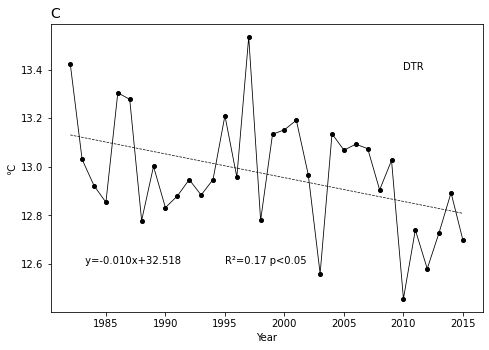

In [68]:
fig4=plt.figure(figsize=(12,10))
ax5 = fig4.add_axes([0.0,0.0,0.5,0.4])
ax5.plot(year,Mean_DTR,lw=0.8,marker='o',color='k',ms='4')
ax5.plot(year,s6*year+d6,'k--',lw=0.7)
ax5.set_xlabel('Year')
ax5.set_ylabel('℃')
ax5.text(1983,12.6,' y=-0.010x+32.518 ')
ax5.text(1995,12.6,'R²=0.17 p<0.05 ')
ax5.text(2010,13.4,'DTR')
ax5.set_title('C ',fontsize=14,loc='left')

In [48]:
s7,d7,r7,p7,_ = linregress(year, Mean_TX90)
s7,d7,r7,p7

(0.5730165490142508,
 -1108.6441724890212,
 0.5933292830687258,
 0.0002169578050495057)

In [49]:
s8,d8,r8,p8,_ = linregress(year, Mean_TN90)
s8,d8,r8,p8

(0.6165662330774808,
 -1195.6782050406396,
 0.6995430730031339,
 4.15437676547887e-06)

In [50]:
s9,d9,r9,p9,_ = linregress(year, Mean_TX10)
s9,d9,r9,p9

(-0.07491182573705667,
 186.2462183085105,
 -0.06710281051314215,
 0.7061264604145078)

In [51]:
s10,d10,r10,p10,_ = linregress(year, Mean_TN10)
s10,d10,r10,p10

(-0.24581218048314876,
 527.7850544602787,
 -0.2237466882542028,
 0.2033530904894017)

Text(0.0, 1.0, 'D ')

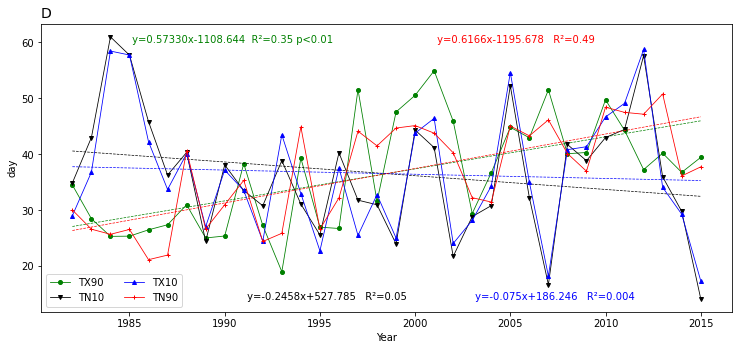

In [69]:
fig5=plt.figure(figsize=(12,10))
ax6 = fig5.add_axes([0.0,0.0,0.8,0.4])
ax6.plot(year,Mean_TX90,lw=0.8,marker='o',color='g',ms='4',label='TX90')
ax6.plot(year,s7*year+d7,'g--',lw=0.7)
ax6.plot(year,Mean_TN10,lw=0.8,marker='v',color='k',ms='4',label='TN10')
ax6.plot(year,s10*year+d10,'k--',lw=0.7)
ax6.plot(year,Mean_TX10,lw=0.8,marker='^',color='b',ms='4',label='TX10')
ax6.plot(year,s9*year+d9,'b--',lw=0.7)
ax6.plot(year,Mean_TN90,lw=0.8,marker='+',color='r',ms='4',label='TN90')
ax6.plot(year,s8*year+d8,'r--',lw=0.7)
ax6.set_xlabel('Year')
ax6.set_ylabel('day')
ax6.legend(loc=3,ncol=2)
ax6.text(1985,60,' y=0.57330x-1108.644  R²=0.35 p<0.01 ',c='g')
ax6.text(2001,60,' y=0.6166x-1195.678   R²=0.49 ',c='r')
ax6.text(1991,14,' y=-0.2458x+527.785   R²=0.05 ',c='k')
ax6.text(2003,14,' y=-0.075x+186.246   R²=0.004 ',c='b')
ax6.set_title('D ',fontsize=14,loc='left')

In [54]:
s11,d11,r11,p11,_ = linregress(year, Mean_Rx1day)
s11,d11,r11,p11

(-0.04957558797278234,
 129.9970735539727,
 -0.11601062213376029,
 0.5135230434786371)

Text(1985, 42, 'R1day  y=-0.0496x+129.997  R²=0.01 ')

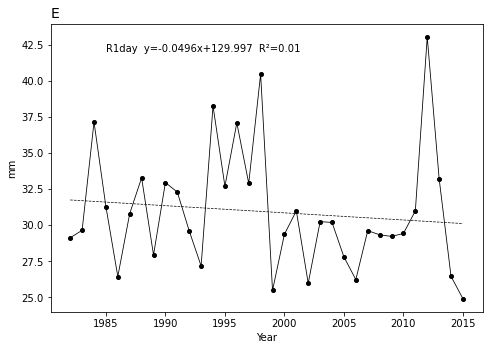

In [70]:
fig6=plt.figure(figsize=(12,10))
ax7 = fig6.add_axes([0.0,0.0,0.5,0.4])
ax7.plot(year,Mean_Rx1day,lw=0.8,marker='o',c='k',ms='4')
ax7.plot(year,s11*year+d11,'k--',lw=0.7)
ax7.set_xlabel('Year')
ax7.set_ylabel('mm')
ax7.set_title('E ',fontsize=14,loc='left')
ax7.text(1985,42,'R1day  y=-0.0496x+129.997  R²=0.01 ')

改后

In [10]:
s11,d11,r11,p11,_ = linregress(year, Mean_Rx1day)
s11,d11,r11,p11

(-0.0507485680401644,
 132.42487117746936,
 -0.11990949700466806,
 0.4993724386581876)

Text(1985, 42, 'R1day  y=-0.05x+132.425  R²=0.01 ')

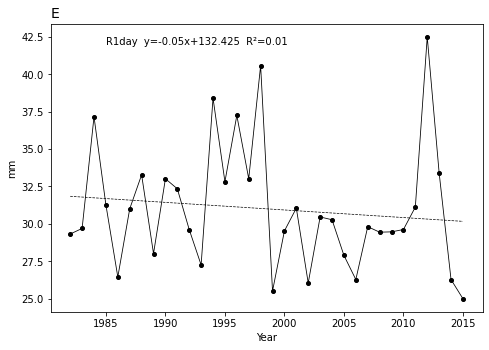

In [12]:
fig6=plt.figure(figsize=(12,10))
ax7 = fig6.add_axes([0.0,0.0,0.5,0.4])
ax7.plot(year,Mean_Rx1day,lw=0.8,marker='o',c='k',ms='4')
ax7.plot(year,s11*year+d11,'k--',lw=0.7)
ax7.set_xlabel('Year')
ax7.set_ylabel('mm')
ax7.set_title('E ',fontsize=14,loc='left')
ax7.text(1985,42,'R1day  y=-0.05x+132.425  R²=0.01 ')

In [56]:
s12,d12,r12,p12,_ = linregress(year, Mean_R1m)
s13,d13,r13,p13,_ = linregress(year, Mean_R10m)
s14,d14,r14,p14,_ = linregress(year, Mean_R20m)
s12,d12,r12,p12,s13,d13,r13,p13,s14,d14,r14,p14

(0.04051638924501796,
 -22.361240468560673,
 0.07719849097618701,
 0.6643232131125665,
 -0.00860126275338682,
 25.90971463300327,
 -0.05863685658074198,
 0.7418507699617497,
 -0.006081461378233045,
 14.595971429794231,
 -0.09702746470649705,
 0.5851406407454564)

Text(0.0, 1.0, 'F ')

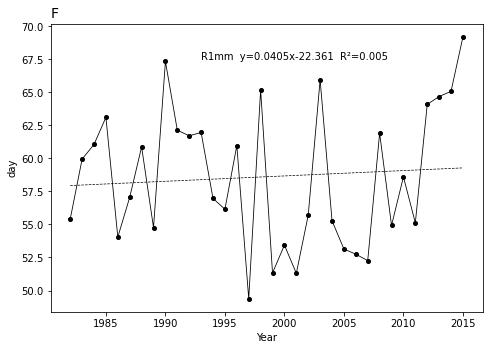

In [74]:
fig7=plt.figure(figsize=(12,10))
ax8 = fig7.add_axes([0.0,0.0,0.5,0.4])
ax8.plot(year,Mean_R1m,lw=0.8,marker='o',c='k',ms='4')
ax8.plot(year,s12*year+d12,'k--',lw=0.7)
ax8.text(1993,67.5,'R1mm  y=0.0405x-22.361  R²=0.005 ')
ax8.set_xlabel('Year')
ax8.set_ylabel('day')
ax8.set_title('F ',fontsize=14,loc='left')

Text(0.0, 1.0, 'G ')

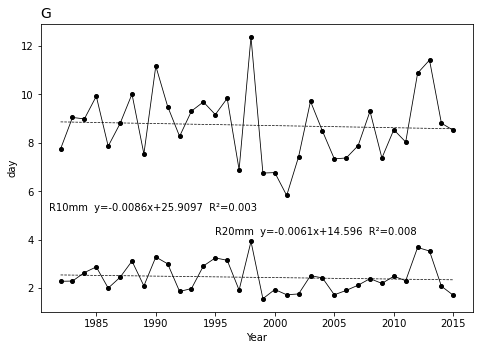

In [73]:
fig8=plt.figure(figsize=(12,10))
ax9 = fig8.add_axes([0.0,0.0,0.5,0.4])
ax9.plot(year,Mean_R10m,lw=0.8,marker='o',c='k',ms='4')
ax9.plot(year,s13*year+d13,'k--',lw=0.7)
ax9.plot(year,Mean_R20m,lw=0.8,marker='o',c='k',ms='4')
ax9.plot(year,s14*year+d14,'k--',lw=0.7)
ax9.text(1981,5.2,'R10mm  y=-0.0086x+25.9097  R²=0.003 ')
ax9.text(1995,4.2,'R20mm  y=-0.0061x+14.596  R²=0.008 ')
ax9.set_xlabel('Year')
ax9.set_ylabel('day')
ax9.set_title('G ',fontsize=14,loc='left')

改后

In [13]:
s12,d12,r12,p12,_ = linregress(year, Mean_R1m)
s13,d13,r13,p13,_ = linregress(year, Mean_R10m)
s14,d14,r14,p14,_ = linregress(year, Mean_R20m)
s12,d12,r12,p12,s13,d13,r13,p13,s14,d14,r14,p14

(0.004927596871046003,
 48.74249916688644,
 0.010047101619319366,
 0.9550277815647401,
 -0.007349234960569144,
 23.422386667690173,
 -0.05028891642057928,
 0.7776040098768373,
 -0.005941067823842796,
 14.31634511106155,
 -0.09529225547001974,
 0.5919007871118898)

Text(0.0, 1.0, 'F ')

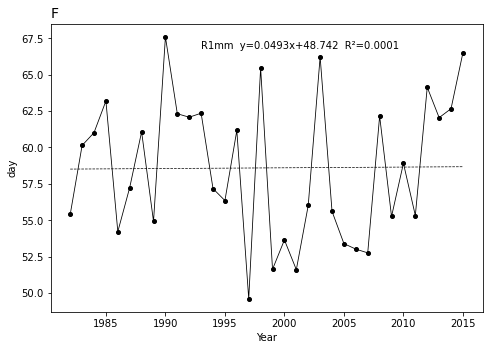

In [16]:
fig7=plt.figure(figsize=(12,10))
ax8 = fig7.add_axes([0.0,0.0,0.5,0.4])
ax8.plot(year,Mean_R1m,lw=0.8,marker='o',c='k',ms='4')
ax8.plot(year,s12*year+d12,'k--',lw=0.7)
ax8.text(1993,66.8,'R1mm  y=0.0493x+48.742  R²=0.0001 ')
ax8.set_xlabel('Year')
ax8.set_ylabel('day')
ax8.set_title('F ',fontsize=14,loc='left')

Text(0.0, 1.0, 'G ')

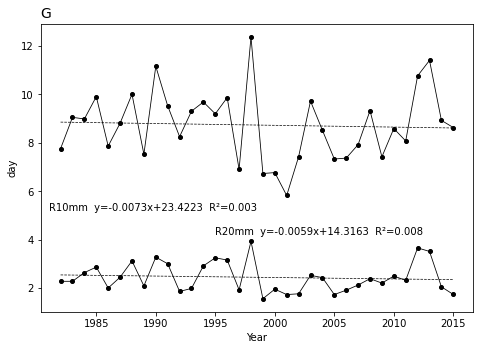

In [18]:
fig8=plt.figure(figsize=(12,10))
ax9 = fig8.add_axes([0.0,0.0,0.5,0.4])
ax9.plot(year,Mean_R10m,lw=0.8,marker='o',c='k',ms='4')
ax9.plot(year,s13*year+d13,'k--',lw=0.7)
ax9.plot(year,Mean_R20m,lw=0.8,marker='o',c='k',ms='4')
ax9.plot(year,s14*year+d14,'k--',lw=0.7)
ax9.text(1981,5.2,'R10mm  y=-0.0073x+23.4223  R²=0.003 ')
ax9.text(1995,4.2,'R20mm  y=-0.0059x+14.3163  R²=0.008 ')
ax9.set_xlabel('Year')
ax9.set_ylabel('day')
ax9.set_title('G ',fontsize=14,loc='left')

# 多年区域平均相关

In [272]:
R,P=pearsonr(ndvi_area_mean,Mean_TXX)
R,P

(0.10372294395068268, 0.5593821771607096)

In [274]:
R2,P2=pearsonr(ndvi_area_mean,Mean_TXn)
R2,P2

(-0.022678365585007174, 0.8986978649286452)

In [275]:
R3,P3=pearsonr(ndvi_area_mean,Mean_TNN)
R3,P3

(0.038396368922524904, 0.8293055137857525)

In [276]:
R4,P4=pearsonr(ndvi_area_mean,Mean_TNx)
R4,P4

(0.2567245979542232, 0.14274378421201006)

In [277]:
R5,P5=pearsonr(ndvi_area_mean,Mean_DTR)
R5,P5

(-0.4307372395298039, 0.010988967612289657)

In [278]:
R6,P6=pearsonr(ndvi_area_mean,Mean_TX90)
R6,P6

(0.18523353789466468, 0.2942709758594629)

In [279]:
R7,P7=pearsonr(ndvi_area_mean,Mean_TX10)
R7,P7

(-0.0877804109230315, 0.6215512906094323)

In [280]:
R8,P8=pearsonr(ndvi_area_mean,Mean_TN90)
R8,P8

(0.5061434525957882, 0.0022574156347975496)

In [281]:
R9,P9=pearsonr(ndvi_area_mean,Mean_TN10)
R9,P9

(-0.14565846862489018, 0.41110182352913344)

In [282]:
R10,P10=pearsonr(ndvi_area_mean,Mean_Rx1day)
R10,P10

(0.3601125058210821, 0.03643642367705733)

In [283]:
R11,P11=pearsonr(ndvi_area_mean,Mean_R1m)
R11,P11

(0.445181307083465, 0.008332416421939751)

In [284]:
R12,P12=pearsonr(ndvi_area_mean,Mean_R10m)
R12,P12

(0.4948928826687393, 0.0029249556925064098)

In [285]:
R13,P13=pearsonr(ndvi_area_mean,Mean_R20m)
R13,P13

(0.4578988092527504, 0.006466837385812166)

改后

In [33]:
R10,P10=pearsonr(ndvi_area_mean,Mean_Rx1day)
R10,P10

(0.35110141531887884, 0.04174922443851737)

In [34]:
R11,P11=pearsonr(ndvi_area_mean,Mean_R1m)
R11,P11

(0.39146346747919947, 0.022053066082001072)

In [35]:
R12,P12=pearsonr(ndvi_area_mean,Mean_R10m)
R12,P12

(0.5005039593315274, 0.002573241968866846)

In [36]:
R13,P13=pearsonr(ndvi_area_mean,Mean_R20m)
R13,P13

(0.4560827933939169, 0.006709061136139188)

极端气候指数	TXx(℃)	TNx(℃)	TNn(℃)	TXn(℃)	DTR(℃)	TX90(d)	TX10(d)
相关系数	0.104	0.257	0.038	-0.023	-0.431*	0.185	-0.088
极端气候指数	TN90(d)	TN10(d)	Rx1day(d)	R1mm(mm)	R10mm(d)	R20mm(d)	
相关系数	0.506**	-0.145	0.36*	0.445**	0.495**	0.458**	　


# 去趋势

In [38]:
ndvi_trend=signal.detrend(ndvi_area_mean,axis=0,type='linear')
TXX_trend =signal.detrend(Mean_TXX,axis=0,type='linear')
TXn_trend =signal.detrend(Mean_TXn,axis=0,type='linear')
TNN_trend =signal.detrend(Mean_TNN,axis=0,type='linear')
TNx_trend =signal.detrend(Mean_TNx,axis=0,type='linear')
DTR_trend =signal.detrend(Mean_DTR,axis=0,type='linear')
TX90_trend =signal.detrend(Mean_TX90,axis=0,type='linear')
TX10_trend =signal.detrend(Mean_TX10,axis=0,type='linear')
TN90_trend =signal.detrend(Mean_TN90,axis=0,type='linear')
TN10_trend =signal.detrend(Mean_TN10,axis=0,type='linear')
Rx1day_trend =signal.detrend(Mean_Rx1day,axis=0,type='linear')
R1m_trend =signal.detrend(Mean_R1m,axis=0,type='linear')
R10m_trend =signal.detrend(Mean_R10m,axis=0,type='linear')
R20m_trend =signal.detrend(Mean_R20m,axis=0,type='linear')

In [292]:
R14,P14=pearsonr(ndvi_trend,TXX_trend)
R14,P14

(-0.25386210965628686, 0.14740852821347256)

In [293]:
R15,P15=pearsonr(ndvi_trend,TXn_trend)
R15,P15

(-0.012310815893317669, 0.9449090200201425)

In [294]:
R16,P16=pearsonr(ndvi_trend,TNx_trend)
R16,P16

(-0.1456233538661217, 0.4112158345237013)

In [295]:
R17,P17=pearsonr(ndvi_trend,TNN_trend)
R17,P17

(-0.01392785778549668, 0.9376859604529286)

In [296]:
R18,P18=pearsonr(ndvi_trend,DTR_trend)
R18,P18

(-0.2510602030212306, 0.15208104543883283)

In [297]:
R19,P19=pearsonr(ndvi_trend,TX90_trend)
R19,P19

(-0.2762881074925668, 0.11371156198081815)

In [298]:
R20,P20=pearsonr(ndvi_trend,TX10_trend)
R20,P20

(-0.05927141078475055, 0.7391535875176243)

In [299]:
R21,P21=pearsonr(ndvi_trend,TN90_trend)
R21,P21

(0.1409323720081553, 0.4266065262909715)

In [300]:
R22,P22=pearsonr(ndvi_trend,TN10_trend)
R22,P22

(-0.012047011861509138, 0.9460878135378287)

In [301]:
R23,P23=pearsonr(ndvi_trend,Rx1day_trend)
R23,P23

(0.5470458774016805, 0.0008141866500028979)

In [303]:
R24,P24=pearsonr(ndvi_trend,R1m_trend)
R24,P24

(0.5036495014256923, 0.0023926506441211515)

In [304]:
R25,P25=pearsonr(ndvi_trend,R10m_trend)
R25,P25

(0.6703993430621606, 1.439030705125334e-05)

In [305]:
R26,P26=pearsonr(ndvi_trend,R20m_trend)
R26,P26

(0.6551853066501332, 2.611426891748562e-05)

改后

In [39]:
ndvi_trend=signal.detrend(ndvi_area_mean,axis=0,type='linear')
Rx1day_trend =signal.detrend(Mean_Rx1day,axis=0,type='linear')
R1m_trend =signal.detrend(Mean_R1m,axis=0,type='linear')
R10m_trend =signal.detrend(Mean_R10m,axis=0,type='linear')
R20m_trend =signal.detrend(Mean_R20m,axis=0,type='linear')

In [40]:
R23,P23=pearsonr(ndvi_trend,Rx1day_trend)
R23,P23

(0.5388717411032649, 0.0010086152030709633)

In [41]:
R24,P24=pearsonr(ndvi_trend,R1m_trend)
R24,P24

(0.48603158838839144, 0.00356545937887312)

In [42]:
R25,P25=pearsonr(ndvi_trend,R10m_trend)
R25,P25

(0.6707553382915115, 1.418525202536271e-05)

In [43]:
R26,P26=pearsonr(ndvi_trend,R20m_trend)
R26,P26

(0.6514343172234537, 3.009506453064246e-05)

# 空间相关

In [75]:
DTR_r =np.full((101,141),fill_value=np.nan)
DTR_p =np.full((101,141),fill_value=np.nan)

In [93]:
r_year_NDVI2 = year_NDVI2.copy()
r_DTR_matrix = DTR_matrix.copy()
r_year_NDVI2[np.isnan(r_year_NDVI2)]=0
r_DTR_matrix[np.isnan(r_DTR_matrix)]=0

In [81]:
for i in range(101):
    for j in range(141):
        DTR_r[i,j], DTR_p[i,j] =pearsonr(r_year_NDVI2[:,i,j],r_DTR_matrix[:,i,j])

/home/yqr/miniconda3/envs/python/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Text(0.0, 1.0, 'A ')

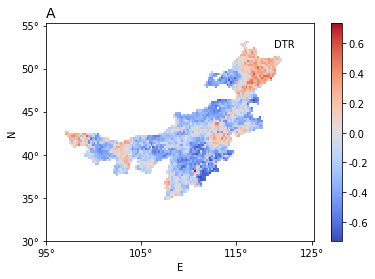

In [110]:
plt.pcolormesh(DTR_r,cmap = 'coolwarm')
plt.colorbar()
plt.xticks([0,50,100,140],('95°','105°','115°','125°'))
plt.yticks([0,20,40,60,80,100],('30°','35°','40°','45°','50°','55°'))
plt.xlabel('E')
plt.ylabel('N')
plt.text(120,90,'DTR ')
plt.title('A ',fontsize=14,loc='left')

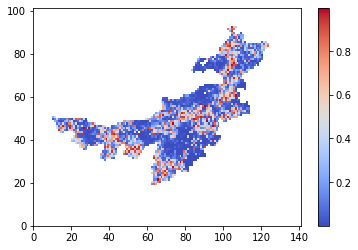

In [343]:
plt.pcolormesh(DTR_p,cmap = 'coolwarm')
plt.colorbar()

In [96]:
r_rx1day_matrix = rx1day_matrix.copy()
r_rx1day_matrix[np.isnan(r_rx1day_matrix)]=0
rx1day_r=np.full((101,141),fill_value=np.nan)
rx1day_p=np.full((101,141),fill_value=np.nan)

In [86]:
r_rx1day_matrix.shape

(34, 101, 141)

In [112]:
for i in range(101):
    for j in range(141):
        rx1day_r[i,j], rx1day_p[i,j] =pearsonr(r_year_NDVI2[:,i,j],r_rx1day_matrix[:,i,j])

Text(0.0, 1.0, 'B ')

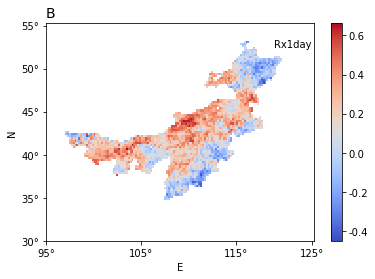

In [113]:
plt.pcolormesh(rx1day_r,cmap = 'coolwarm')
plt.colorbar()
plt.xticks([0,50,100,140],('95°','105°','115°','125°'))
plt.yticks([0,20,40,60,80,100],('30°','35°','40°','45°','50°','55°'))
plt.xlabel('E')
plt.ylabel('N')
plt.text(120,90,'Rx1day ')
plt.title('B ',fontsize=14,loc='left')

改后

In [53]:
r_year_NDVI2 = year_NDVI2.copy()
r_year_NDVI2[np.isnan(r_year_NDVI2)]=0
r_rx1day_matrix = rx1day_matrix.copy()
r_rx1day_matrix[np.isnan(r_rx1day_matrix)]=0
rx1day_r=np.full((101,141),fill_value=np.nan)
rx1day_p=np.full((101,141),fill_value=np.nan)

for i in range(101):
    for j in range(141):
        rx1day_r[i,j], rx1day_p[i,j] =pearsonr(r_year_NDVI2[:,i,j],r_rx1day_matrix[:,i,j])

Text(0.0, 1.0, 'B ')

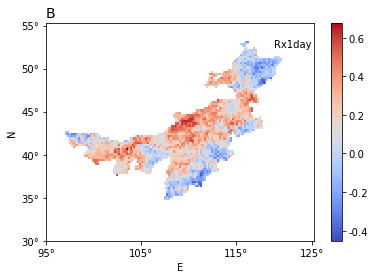

In [54]:
plt.pcolormesh(rx1day_r,cmap = 'coolwarm')
plt.colorbar()
plt.xticks([0,50,100,140],('95°','105°','115°','125°'))
plt.yticks([0,20,40,60,80,100],('30°','35°','40°','45°','50°','55°'))
plt.xlabel('E')
plt.ylabel('N')
plt.text(120,90,'Rx1day ')
plt.title('B ',fontsize=14,loc='left')

In [95]:
r_r1mm_matrix = r1mm_matrix.copy()
r_r1mm_matrix[np.isnan(r_r1mm_matrix)]=0
r1mm_r=np.full((101,141),fill_value=np.nan)
r1mm_p=np.full((101,141),fill_value=np.nan)

In [115]:
for i in range(101):
    for j in range(141):
        r1mm_r[i,j], r1mm_p[i,j] =pearsonr(r_year_NDVI2[:,i,j],r_r1mm_matrix[:,i,j])

Text(0.0, 1.0, 'C ')

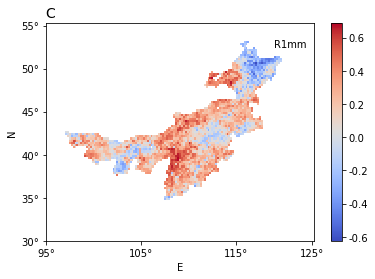

In [116]:
plt.pcolormesh(r1mm_r,cmap = 'coolwarm')
plt.colorbar()
plt.xticks([0,50,100,140],('95°','105°','115°','125°'))
plt.yticks([0,20,40,60,80,100],('30°','35°','40°','45°','50°','55°'))
plt.xlabel('E')
plt.ylabel('N')
plt.text(120,90,'R1mm ')
plt.title('C ',fontsize=14,loc='left')

In [97]:
ndvi2_trend=signal.detrend(r_year_NDVI2,axis=0,type='linear')
DTR2_trend=signal.detrend(r_DTR_matrix,axis=0,type='linear')
R1xday_trend =signal.detrend(r_rx1day_matrix,axis=0,type='linear')
R1mm_trend = signal.detrend(r_r1mm_matrix,axis=0,type='linear')

In [98]:
DTR_r2 =np.full((101,141),fill_value=np.nan)
DTR_p2 =np.full((101,141),fill_value=np.nan)
R1xday_r2 =np.full((101,141),fill_value=np.nan)
R1xday_p2 =np.full((101,141),fill_value=np.nan)
R1mm_r2 =np.full((101,141),fill_value=np.nan)
R1mm_p2 =np.full((101,141),fill_value=np.nan)

In [99]:
for i in range(101):
    for j in range(141):
        DTR_r2[i,j], DTR_p2[i,j] =pearsonr(ndvi2_trend[:,i,j],DTR2_trend[:,i,j])

In [100]:
for i in range(101):
    for j in range(141):
        R1xday_r2[i,j], R1xday_p2[i,j] =pearsonr(ndvi2_trend[:,i,j],R1xday_trend[:,i,j])

In [101]:
for i in range(101):
    for j in range(141):
        R1mm_r2[i,j], R1mm_p2[i,j] =pearsonr(ndvi2_trend[:,i,j],R1mm_trend[:,i,j])

Text(0.0, 1.0, 'D ')

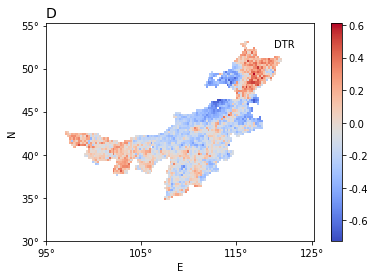

In [117]:
plt.pcolormesh(DTR_r2,cmap = 'coolwarm')
plt.colorbar()
plt.xticks([0,50,100,140],('95°','105°','115°','125°'))
plt.yticks([0,20,40,60,80,100],('30°','35°','40°','45°','50°','55°'))
plt.xlabel('E')
plt.ylabel('N')
plt.text(120,90,'DTR ')
plt.title('D ',fontsize=14,loc='left')

Text(0.0, 1.0, 'E ')

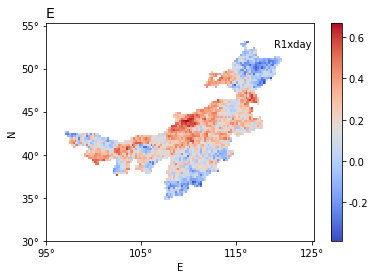

In [118]:
plt.pcolormesh(R1xday_r2,cmap = 'coolwarm')
plt.colorbar()
plt.xticks([0,50,100,140],('95°','105°','115°','125°'))
plt.yticks([0,20,40,60,80,100],('30°','35°','40°','45°','50°','55°'))
plt.xlabel('E')
plt.ylabel('N')
plt.text(120,90,'R1xday ')
plt.title('E ',fontsize=14,loc='left')

Text(0.0, 1.0, 'F ')

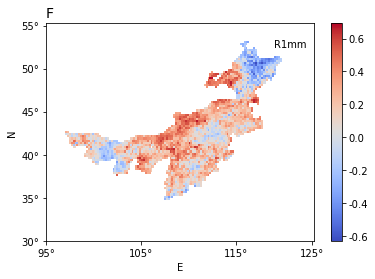

In [119]:
plt.pcolormesh(R1mm_r2,cmap = 'coolwarm')
plt.colorbar()
plt.xticks([0,50,100,140],('95°','105°','115°','125°'))
plt.yticks([0,20,40,60,80,100],('30°','35°','40°','45°','50°','55°'))
plt.xlabel('E')
plt.ylabel('N')
plt.text(120,90,'R1mm ')
plt.title('F ',fontsize=14,loc='left')

# 广义线性模型

In [184]:
from sklearn import linear_model
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import Lasso,LassoCV
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import seaborn as sns
from sklearn import metrics

In [39]:
Mean_TXX2=Mean_TXX.reshape(34,1)
Mean_TNN2=Mean_TNN.reshape(34,1)
Mean_TNx2=Mean_TNx.reshape(34,1)
Mean_TXn2=Mean_TXn.reshape(34,1)
Mean_DTR2= Mean_DTR.reshape(34,1)
Mean_TN902 = Mean_TN90.reshape(34,1)
Mean_TN102=Mean_TN10.reshape(34,1)
Mean_TX102=Mean_TX10.reshape(34,1)
Mean_TX902=Mean_TX90.reshape(34,1)
Mean_Rx1day2=Mean_Rx1day.reshape(34,1)
Mean_R1m2 = Mean_R1m.reshape(34,1)
Mean_R10m2=Mean_R10m.reshape(34,1)
Mean_R20m2=Mean_R20m.reshape(34,1)
ttt=np.concatenate((Mean_TXX2,Mean_TNN2,Mean_TNx2,Mean_TXn2,Mean_DTR2,Mean_TN902,Mean_TN102,Mean_TX102,Mean_TX902,Mean_Rx1day2,Mean_R1m2,Mean_R10m2,Mean_R20m2),axis=1)

In [49]:
ndvi_trend2=ndvi_trend.reshape(34,1)
TXX_trend2 =TXX_trend.reshape(34,1)
TXn_trend2 =TXn_trend.reshape(34,1)
TNN_trend2 =TNN_trend.reshape(34,1)
TNx_trend2 =TNx_trend.reshape(34,1)
DTR_trend2 =DTR_trend.reshape(34,1)
TX90_trend2 =TX90_trend.reshape(34,1)
TX10_trend2 =TX10_trend.reshape(34,1)
TN90_trend2 =TN90_trend.reshape(34,1)
TN10_trend2 =TN10_trend.reshape(34,1)
Rx1day_trend2 =Rx1day_trend.reshape(34,1)
R1m_trend2 =R1m_trend.reshape(34,1)
R10m_trend2 =R10m_trend.reshape(34,1)
R20m_trend2 =R20m_trend.reshape(34,1)
trendX=np.concatenate((TXX_trend2,TXn_trend2,TNN_trend2,TNx_trend2,DTR_trend2,TX90_trend2,TX10_trend2,TN90_trend2,TN10_trend2,Rx1day_trend2,R1m_trend2,R10m_trend2,R20m_trend2),axis=1)

In [54]:
z_scaler = preprocessing.StandardScaler()
trendX_z =z_scaler.fit_transform(trendX)
trendndvi_z=z_scaler.fit_transform(ndvi_trend2)

In [161]:
alphas1 = np.arange(1e-15,1001,10)

In [181]:
ridge2=linear_model.RidgeCV(alphas=alphas1,fit_intercept=True,scoring='neg_mean_squared_error',cv=34).fit(trendX_z, trendndvi_z)

In [166]:
print(ridge2.alpha_)
print(ridge2.best_score_)
print(ridge2.coef_)
print(ridge2.intercept_)
print(ridge2.score(trendX_z, trendndvi_z))

10.000000000000002
-0.6568645839592454
[[ 0.10018611  0.03587356  0.02022205  0.07417438  0.16385415 -0.10124886
  -0.07691074  0.13738187 -0.04323794  0.17564807  0.26790831  0.2668498
   0.20201206]]
[-2.41370756e-17]
0.6035423882630739


In [167]:
lasso3=linear_model.LassoCV(eps=0.001,n_alphas=3000,fit_intercept=True,cv=34).fit(trendX_z, trendndvi_z)

/home/yqr/miniconda3/envs/python/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [185]:
print(lasso3.alpha_ )
print(lasso3.coef_)
print(lasso3.intercept_)
print(lasso3.score(trendX_z, trendndvi_z))
print(lasso3. mse_path_)

0.005897233876155494
[ 0.40151427 -0.         -0.04032854  0.07837239  0.59719912 -0.78727072
  0.          0.64347065 -0.177371    0.23865356  0.74211091  0.
  0.20216835]
1.8439661392714487e-17
0.7075286085043763
[[0.3036772  0.32859577 0.01250526 ... 1.21187787 2.44790262 0.02788615]
 [0.30233502 0.32883278 0.0124718  ... 1.21187787 2.4500552  0.0279096 ]
 [0.30099889 0.32906934 0.01243846 ... 1.21187787 2.45220377 0.02793301]
 ...
 [0.79517215 0.00749627 0.58733692 ... 0.2741315  1.3253156  0.04094654]
 [0.7952522  0.00748443 0.58747305 ... 0.2741234  1.32524355 0.04097705]
 [0.7953168  0.00747045 0.58758683 ... 0.27411531 1.32517285 0.04100759]]


In [183]:
lasso3. mse_path_.shape

(3000, 34)